# Activity: Run simple linear regression

## **Introduction**


As you're learning, simple linear regression is a way to model the relationship between two variables. By assessing the direction and magnitude of a relationship, data professionals are able to uncover patterns and transform large amounts of data into valuable knowledge. This enables them to make better predictions and decisions. 

In this lab, you are part of an analytics team that provides insights about your company's sales and marketing practices. You have been assigned to a project that focuses on the use of influencer marketing. For this task, you will explore the relationship between your radio promotion budget and your sales. 

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

## **Step 1: Imports** 


Import relevant Python libraries and modules.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

The dataset provided is a .csv file (named `marketing_sales_data.csv`), which contains information about marketing conducted in collaboration with influencers, along with corresponding sales. Assume that the numerical variables in the data are expressed in millions of dollars. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

**Note:** This is a fictional dataset that was created for educational purposes and modified for this lab. 

In [3]:
data = pd.read_csv("marketing_sales_data.csv")

## **Step 2: Data exploration** 


In [4]:
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


**Question:** What do you observe about the different variables included in the data?

- The data includes the following information:
    - Promotion budgets for TV, Radio, and Social Media
        - TV: Categorical values into "Low", "Medium", or "High"
        - Radio & Social Media: Numerical values in float
    - Type of influencer that the promotion is in collaboration with (expressed as "Mega", "Macro", or "Micro", or "Nano")
        - "Mega": Over 1 million followers
        - "Macro": 100,000 to 1 million
        - "Micro": 10,000 to 100,000
        - "Nano": Less than 10,000
    - Sales accrued from the promotion

Next, to get a sense of the size of the dataset, identify the number of rows and the number of columns.

In [5]:
data.shape

(572, 5)

**Question:** How many rows and columns exist in the data?

There are 572 rows with 5 columns

Now, check for missing values in the rows of the data. This is important because missing values are not that meaningful when modeling the relationship between two variables. To do so, begin by getting Booleans that indicate whether each value in the data is missing. Then, check both columns and rows for missing values.

In [6]:
# Use .sum() to get the number of rows that contain missing values.
data.isna().any(axis=1).sum()

3

If you would like to read more about the `sum()` function, refer to its documentation in the references section of this lab.

**Question:** How many rows containing missing values?

There are 3 rows containing missing values

Next, drop the rows that contain missing values. Data cleaning makes your data more usable for analysis and regression. Then, check to make sure that the resulting data does not contain any rows with missing values.

In [15]:
# Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped. To update the DataFrame, reassign it to the result.
data = data.dropna(axis=0)

In [7]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.
# Use .sum() to get the number of rows that contain missing values
data.isna().any(axis=1).sum()

3

The next step for this task is checking model assumptions. To explore the relationship between radio promotion budget and sales, model the relationship using linear regression. Begin by confirming whether the model assumptions for linear regression can be made in this context. 

**Note:** Some of the assumptions can be addressed before the model is built. These will be addressed in this section. After the model is built, you will finish checking the assumptions.

Create a plot of pairwise relationships in the data. This will help you visualize the relationships and check model assumptions. 

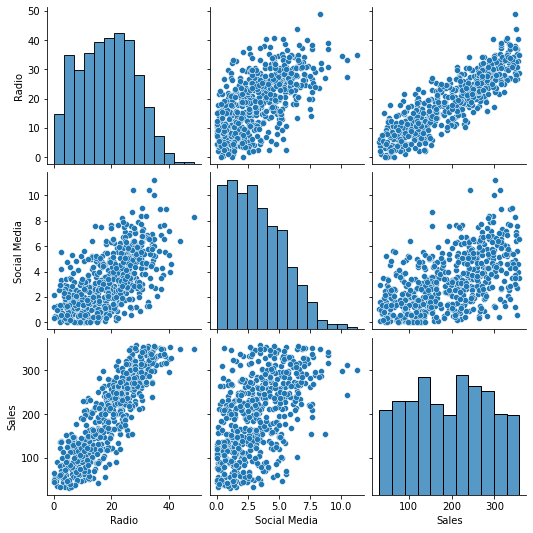

In [8]:
# Create plot of pairwise relationships.
sns.pairplot(data)

**Question:** Is the assumption of linearity met?

'Radio' and 'Sales' show that points align around the line indicating a positive correlation; so that it meets the assumption of lienary.

## **Step 3: Model building** 

Select only the columns that are needed for the model.

In [9]:
# Select relevant columns.
# Save resulting DataFrame in a separate variable to prepare for regression.
ols_data = data[["Radio", "Sales"]]

Now, display the first 10 rows of the new DataFrame to better understand the data.

In [10]:
# Display first 10 rows of the new DataFrame.
ols_data.head(10)

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


Next, write the linear regression formula for modeling the relationship between the two variables of interest.

In [11]:
# Write the linear regression formula.
# Save it in a variable.
ols_formula = "Sales ~ Radio"

Now, implement the ordinary least squares (OLS) approach for linear regression.

In [12]:
# Implement OLS.
OLS = ols(formula = ols_formula, data = ols_data)

Now, create a linear regression model for the data and fit the model to the data.

In [13]:
# Fit the model to the data.
# Save the fitted model in a variable.
model = OLS.fit()

## **Step 4: Results and evaluation** 


Begin by getting a summary of the results from the model.

In [14]:
# Get summary of results.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1781.
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.96e-177
Time:                        04:50:35   Log-Likelihood:                -2971.5
No. Observations:                 570   AIC:                             5947.
Df Residuals:                     568   BIC:                             5956.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4488      4.061     10.206      0.000      33.472      49.426
Radio          8.1799      0.194     42.206      0.000       7.799       8.561
==============================================================================
Omnibus:                        2.272   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                2.236
Skew:                          -0.105   Prob(JB):                        0.327
Kurtosis:                       2.776   Cond. No.                         45.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next, analyze the bottom table from the results summary. Based on the table, identify the coefficients that the model determined would generate the line of best fit. The coefficients are the y-intercept and the slope. 

**Question:** What linear equation would you write to express the relationship between sales and radio promotion budget? Use the form of y = slope * x + y-intercept? 


$$ Sales = RadioPromotionBudget * 8.1733 + 41.5326 $$

**Question:** What does the slope mean in this context?

If the company increases 1 more million dollars for Radio Promotion Budget, it is likely that the Sales increases by  8.1733 million dollars in average

Now that you've built the linear regression model and fit it to the data, finish checking the model assumptions. This will help confirm your findings. First, plot the OLS data with the best fit regression line.

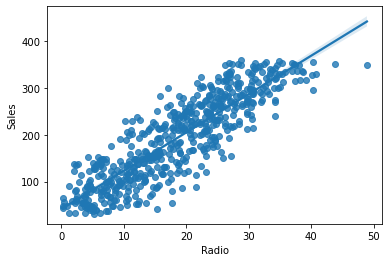

In [15]:
# Plot the OLS data with the best fit regression line.
sns.regplot(x = "Radio", y = "Sales", data = ols_data)

**Question:** What do you observe from the preceding regression plot?

The points align around the line and two variables show the positive correlation indicating that the assumption of linearity is met.

Now, check the normality assumption. Get the residuals from the model.

In [16]:
# Get the residuals from the model.
residuals = model.resid

Now, visualize the distribution of the residuals.

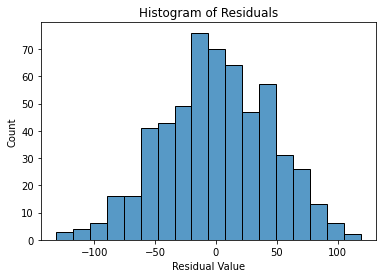

In [17]:
# Visualize the distribution of the residuals.
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

**Question:** Based on the visualization, what do you observe about the distribution of the residuals?

Based on the histgram showing distribution of residual values, it is likely that the assumption of normality is met.

Next, create a Q-Q plot to confirm the assumption of normality.

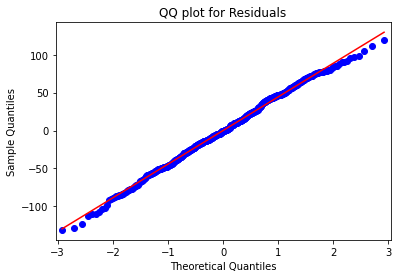

In [18]:
# Create a Q-Q plot.
sm.qqplot(residuals, line='s')
plt.title('QQ plot for Residuals')
plt.show()

**Question:** Is the assumption of normality met?

Since the points align around the straight line in the QQ plot, it shows that the assumption of normality is met.

Now, check the assumptions of independent observation and homoscedasticity. Start by getting the fitted values from the model.

In [19]:
# Get fitted values.
fitted_values = model.predict(ols_data["Radio"])

Next, create a scatterplot of the residuals against the fitted values.

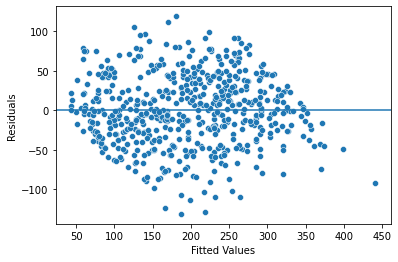

In [20]:
# Create a scatterplot of residuals against fitted values.
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

**Question:** Are the assumptions of independent observation and homoscedasticity met?


Since the points show the cloud-like resemblance and do not show specific patterns, it is likely that the assumption of homoscedasticity is met.

**References**

[Pandas.DataFrame.Any — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)

[Pandas.DataFrame.Isna — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)

[Pandas.Series.Sum — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html)

[Saragih, H.S. *Dummy Marketing and Sales Data*.](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)